In [1]:
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import operator

In [2]:
def generate_lst(r):
    """generate two list with length r, the 2nd list comes from randomly shuffling the first one"""
    l1 = list(range(r))
    l2 = l1.copy()
    shuffle(l2) # PGA: Investigate the properties of shuffle
    result = [l1,l2]
    return result

In [3]:
def get_fixed_pts(ordered_set, random_comb):
    fixed_pts = []
    for i in range(len(ordered_set)):
        if ordered_set[i] == random_comb[i]:
            fixed_pts.append(ordered_set[i])
    return fixed_pts

In [4]:
def get_cycles(ordered_set, random_comb):
    """this function list out the cycles in a permutation"""
    """my logic:
            outer loop:
            inner loop:
                find what the current item goes to
                add that to the cycle
                set "current item" to that
                stop when you get to the first item
            add a list containing those items to the list of cycles
            start again with an item you haven't used yet
            keep going until the lists are empty (or only have one item)"""
    perm = [ordered_set, random_comb]
    cycle_list = []
    possible_beginnings= perm[0].copy()
    while True:
        if len(possible_beginnings)<2:
            break
        start = possible_beginnings[0]
        current = start
        new = perm[1][perm[0].index(start)]
        possible_beginnings.remove(start)
        if start == new:
            continue
        cycle = [start,new]
        current = new
        while True:
            possible_beginnings.remove(current)
            current = perm[1][perm[0].index(current)]
            if current == start:
                break
            cycle.append(current)
        cycle_list.append(cycle)
    return cycle_list + [get_fixed_pts(ordered_set, random_comb)]

In [5]:
def num_of_cycles(perm):
    cycle = get_cycles(perm[0], perm[1])
    cleaned_lst = [x for x in cycle if x != []]
    output = {}
    for num in range(len(perm[0])+1):
        output[num] = 0 #build a dictionary with index to be the possible length, but the sublist should be 0 meaning we haven't started the count yet
    for sublist in cleaned_lst: #deal with each individual cycle
        output[len(sublist)] += 1
    return output

In [6]:
def generate_graph(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim)
        cycle_lst = num_of_cycles(perm)
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    plt.bar(*zip(*sorted(total_cycle.items())))
    plt.plot(*zip(*sorted(total_cycle.items())), color='green')
    #plt.xticks(y_pos, objects)
    plt.xlabel('length of cycles')
    plt.ylabel('Number of Cycles')
    plt.title('number of cycles vs. length of cycles')
    plt.show()
    print ("average = " + str(average(total_cycle)))
    print ("median = " + str(median(total_cycle)))
    print ("mode = " + str(mode(total_cycle)))

In [7]:
def average(cycle_lst):
    total_num_of_cycles = sum(cycle_lst.values())
    total_length_of_cycles = 0
    for key in cycle_lst:
        total_length_of_cycles += key * cycle_lst[key]
    if total_num_of_cycles != 0:
        return total_length_of_cycles/total_num_of_cycles

def median(cycle_lst):
    lst = []
    for key in cycle_lst:
        lst.extend([key for i in range(cycle_lst[key])])
    return statistics.median(lst)

def mode(cycle_lst):
    return max(cycle_lst.items(), key=operator.itemgetter(1))[0]

In [8]:
def calculate_average(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim)
        cycle_lst = num_of_cycles(perm)
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    return average(total_cycle)

def calculate_median(dim, trial):
    total_cycle = {}
    for num in range(1,dim+1):
        total_cycle[num] = 0
    for k in range(trial):
        perm = generate_lst(dim) ### generate a new random lst order
        cycle_lst = num_of_cycles(perm)   
        del cycle_lst[0]
        for key in cycle_lst:
            total_cycle[key] += cycle_lst[key]   ### count the total number of cycles with certain length (key) by incrementing the dictionary
    return median(total_cycle)

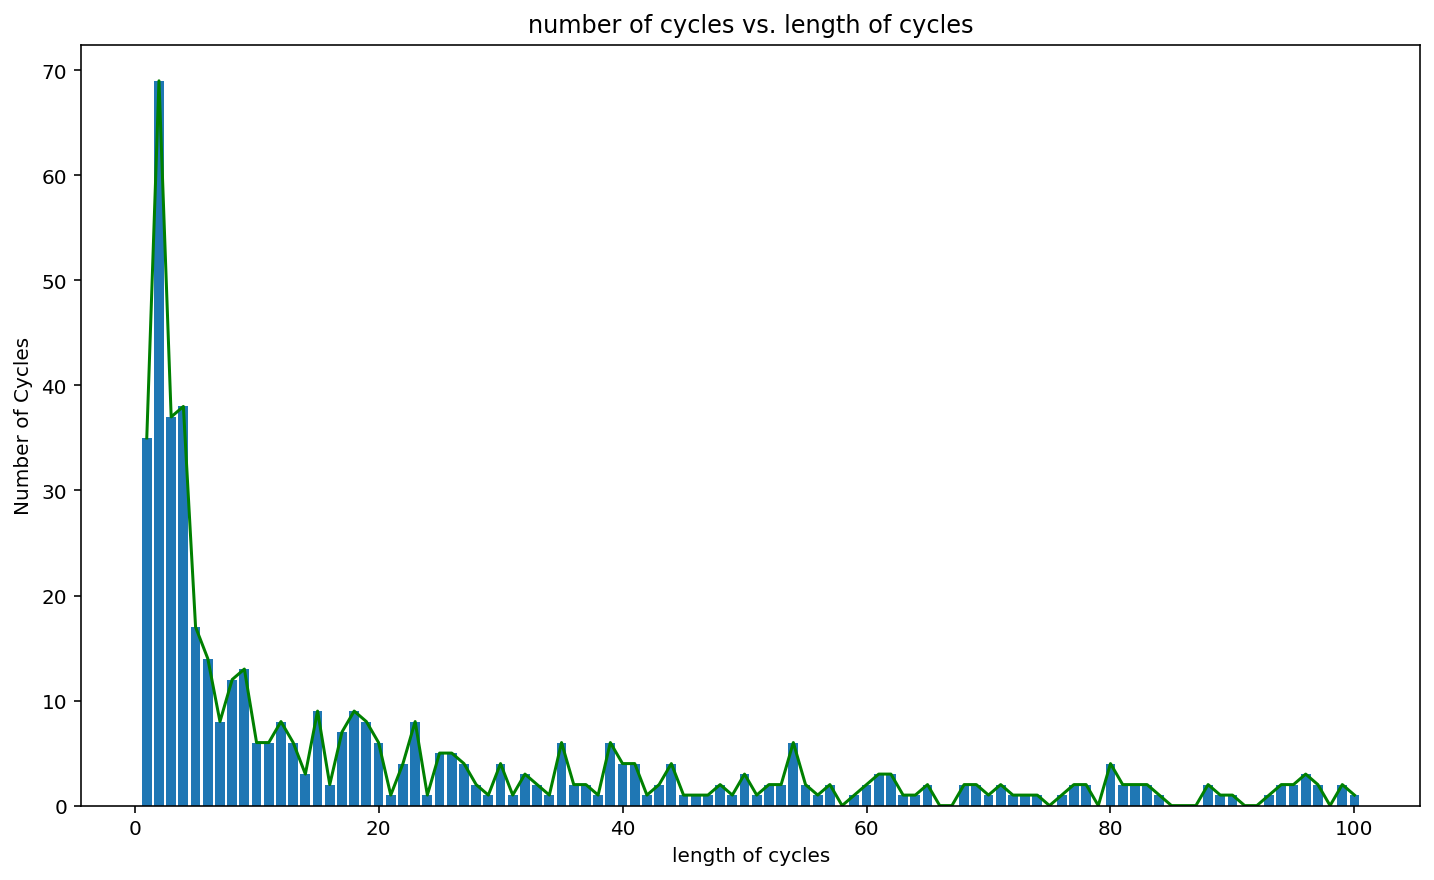

average = 21.367521367521366
median = 9.0
mode = 2


In [9]:
generate_graph(100,100)

In [10]:
# Graphing average with n increases
for n in range(1000):
    if n%10==0:
        y_value = calculate_average(n, 100)
        plt.scatter(n, y_value)
x = np.linspace(0,1000,100)
y=x/np.log(x)
plt.plot(x,y,'r')
plt.xlabel('length of sets')
plt.ylabel('Average length of cycles')
plt.title('Average length of Cycles vs. Length n')
plt.show()

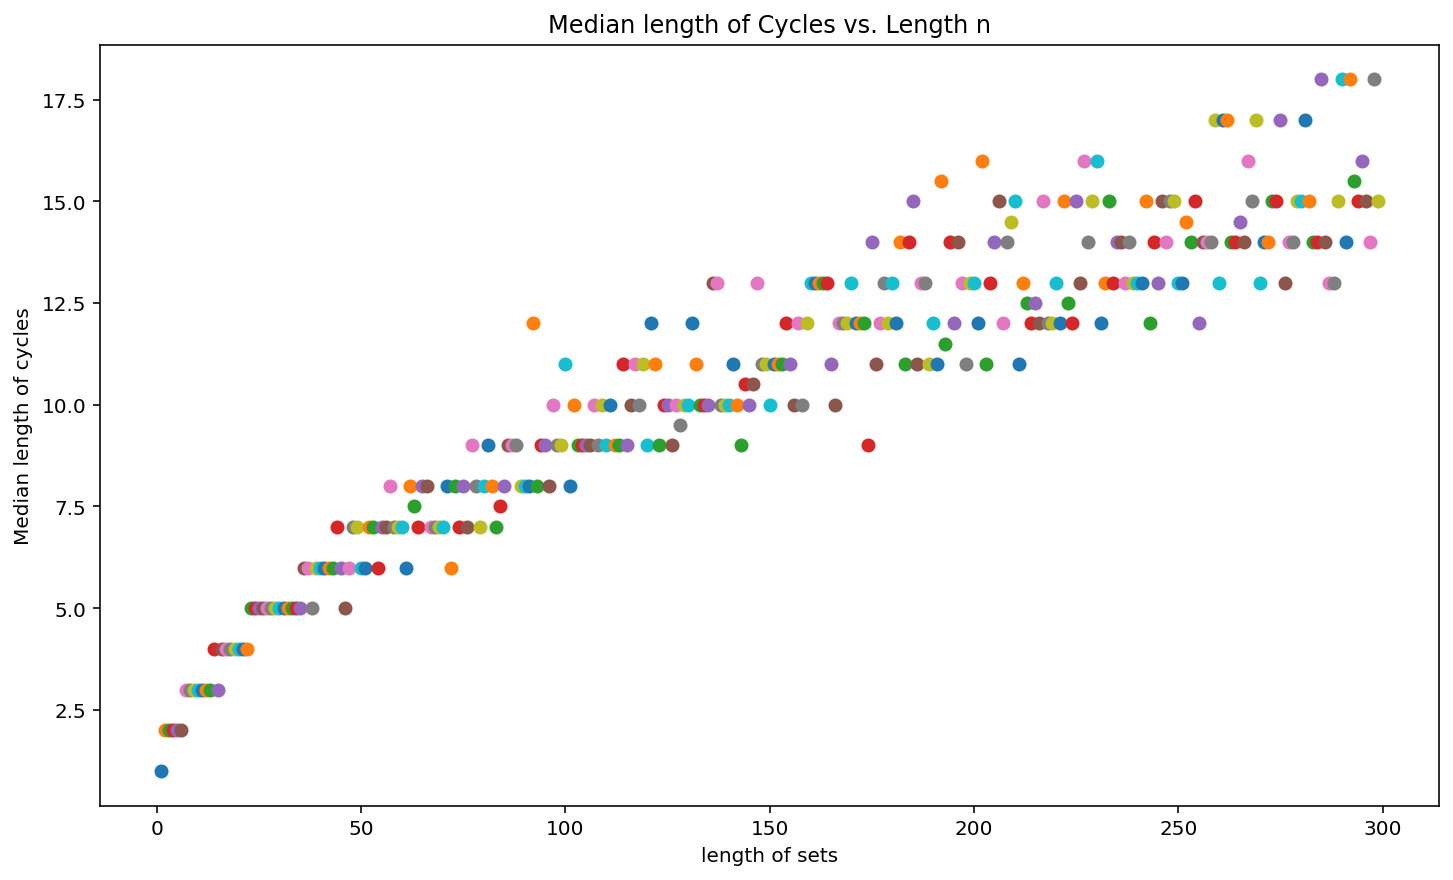

In [16]:
# Graphing medium with n increases
for n in range(1, 300):
    y_value = calculate_median(n, 100)
    plt.scatter(n, y_value)
plt.xlabel('length of sets')
plt.ylabel('Median length of cycles')
plt.title('Median length of Cycles vs. Length n')
plt.show()

In [12]:
x_list = []
y_list = []
for i in range(1,1000):
    x = i
    y = calculate_median(i,100)
    x_list.append(x)
    y_list.append(y)
str1 = ' '.join(str(e) for e in y_list)
str1

KeyboardInterrupt: 

In [0]:
x = np.linspace(0,1000,100)
y=6.5*np.log(x)-20
plt.plot(x,y,'r')
plt.show()